In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [7]:
def image_deal(image_path, thresh_min=100, thresh_max=255, morph_kernel_size=5, min_object_area=2000, border_margin=5):
    # Read and convert image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Thresholding
    thresh = cv2.inRange(img_gray, thresh_min, thresh_max)

    # Morphological filtering (remove noise, fill holes)
    kernel = np.ones((morph_kernel_size, morph_kernel_size), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    opening = opening.astype(np.uint8)

    # Remove border-touching objects
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)
    mask_clean = np.zeros_like(opening, dtype=np.uint8)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if (x > border_margin and y > border_margin and 
            (x + w) < opening.shape[1] - border_margin and 
            (y + h) < opening.shape[0] - border_margin):
            mask_clean[labels == i] = 255

    # Filter by area
    mask_clean = mask_clean.astype(np.uint8)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_clean, connectivity=8)
    final_mask = np.zeros_like(mask_clean, dtype=np.uint8)
    count = 0
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= min_object_area:
            final_mask[labels == i] = 255
            count += 1

    image_name = image_path.split('/')[-1].split('.')[0]
    
    # Display result
    plt.figure(figsize=(5, 4))
    plt.subplot(2,1,1)
    plt.imshow(img_rgb)
    plt.title(f'{image_name}')
    plt.axis('off')

    plt.subplot(2,1,2)
    plt.imshow(final_mask, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print(f'n = {count}')

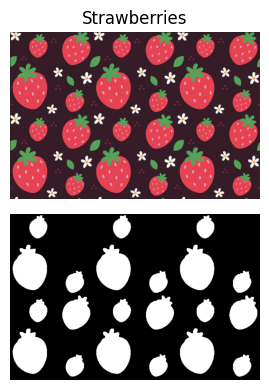

n = 21


In [9]:
image_deal(
    image_path='Strawberries.jpg',
    thresh_min=100,
    thresh_max=255,
    morph_kernel_size=5,
    min_object_area=2000
)

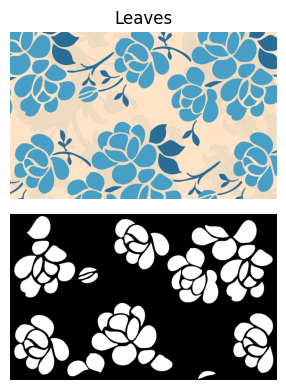

n = 72


In [11]:
image_deal(
    image_path='Leaves.jpg',
    thresh_min=100,
    thresh_max=150,      
    morph_kernel_size=3,  
    min_object_area=300,   
    border_margin=3      
)

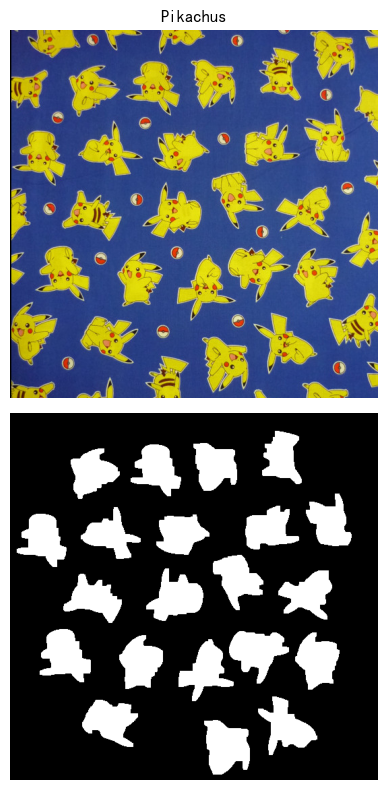

n = 21


In [33]:
image_deal(
    image_path='Pikachus.jpg',
    thresh_min=100,
    thresh_max=255,
    morph_kernel_size=6,
    min_object_area=500
)